In [10]:
from networkit import *
import os
import numpy as np
import math

In [3]:
directory = "/home/harry/geographer-dev/meshes/PEgraphs/"

In [12]:
allMaxDegrees = list()
degVariance = list()
degMean = list()
allGraphs = list()
allMaxNumCores = list()
densities = list()
diameters = list()
sizeN = list()

for file in sorted(os.listdir(directory)):
    if file.endswith(".PEgraph"):
        name = file[:-8]
        allGraphs.append( name )
        
        graphPath = os.path.join(directory, file)
        G = readGraph(graphPath, Format.METIS)
        n = G.numberOfNodes()
        m = G.numberOfEdges()
        
        sizeN.append( n )
        densities.append( G.density() )
        
        maxDegree = G.maxDegree()
        allMaxDegrees.append( maxDegree )
                               
        coreDecomp = community.CoreDecomposition(G).run()
        maxCoreNumber = coreDecomp.maxCoreNumber()
        allMaxNumCores.append( maxCoreNumber )
        
        degreeCentr = centrality.DegreeCentrality(G).run()
        degScores = degreeCentr.scores()
        degVariance.append( np.var(degScores) )
        degMean.append( np.mean(degScores) )
        
        G = G.toUnweighted()
        
        diam = distance.Diameter(G, algo=distance.DiameterAlgo.EstimatedRange, error=0.0 ).run().getDiameter()[1]
        diameters.append( diam )
        
        print( name,\
              "- mean, max, var:", \
              degMean[-1], allMaxDegrees[-1], degVariance[-1],\
              "- coreDecomp sizes",  coreDecomp.getPartition().subsetSizeMap() 
             )
                
        #print("----", file)
        #print( "Number of nodes = {}, number of edges = {}".format(n,m) )
        #print("maxDegree=", maxDegree)
        
numGraphs = len(allGraphs)        

333SP.graph_k128 - mean, max, var: 4.53125 21 7.4833984375 - coreDecomp sizes {2: 16, 3: 112}
333SP.graph_k16 - mean, max, var: 4.125 7 1.734375 - coreDecomp sizes {2: 8, 4: 8}
333SP.graph_k256 - mean, max, var: 4.6328125 60 19.70111083984375 - coreDecomp sizes {2: 34, 3: 222}
333SP.graph_k32 - mean, max, var: 3.8125 18 6.83984375 - coreDecomp sizes {2: 17, 3: 15}
333SP.graph_k64 - mean, max, var: 4.3125 25 10.12109375 - coreDecomp sizes {2: 2, 3: 62}
AS365.graph_k128 - mean, max, var: 5.234375 12 2.179443359375 - coreDecomp sizes {2: 3, 3: 125}
AS365.graph_k16 - mean, max, var: 3.875 8 2.484375 - coreDecomp sizes {1: 1, 2: 2, 3: 13}
AS365.graph_k256 - mean, max, var: 5.4296875 11 1.69036865234375 - coreDecomp sizes {2: 9, 3: 247}
AS365.graph_k32 - mean, max, var: 4.5625 9 2.37109375 - coreDecomp sizes {3: 32}
AS365.graph_k512 - mean, max, var: 5.59375 18 1.7021484375 - coreDecomp sizes {2: 2, 3: 505, 4: 5}
AS365.graph_k64 - mean, max, var: 4.90625 9 2.1787109375 - coreDecomp sizes {2:

In [13]:
part = coreDecomp.getPartition() 
print( part.numberOfElements() )
print( part.numberOfSubsets() )
print( part.subsetSizes() )
print( part.subsetSizeMap() )

64
2
[2, 62]
{2: 2, 3: 62}


In [18]:
for i in range(numGraphs):
    diamEstimate2D = math.pow(2*sizeN[i], 0.5)
    diamEstimate3D = math.pow(3,0.5)*math.pow(sizeN[i], 1.0/3)
    #in general. for dimension d: diam = d^(1/2)*n^(1/d) # where n=k=numPEs
    print(allGraphs[i],": diam=", diameters[i], ", estimate=", diamEstimate2D, " or ", diamEstimate3D)

333SP.graph_k128 : diam= 18 , estimate= 16.0  or  8.728989087773769
333SP.graph_k16 : diam= 5 , estimate= 5.656854249492381  or  4.364494543886885
333SP.graph_k256 : diam= 25 , estimate= 22.627416997969522  or  10.99783709598882
333SP.graph_k32 : diam= 9 , estimate= 8.0  or  5.49891854799441
333SP.graph_k64 : diam= 12 , estimate= 11.313708498984761  or  6.928203230275508
AS365.graph_k128 : diam= 17 , estimate= 16.0  or  8.728989087773769
AS365.graph_k16 : diam= 5 , estimate= 5.656854249492381  or  4.364494543886885
AS365.graph_k256 : diam= 24 , estimate= 22.627416997969522  or  10.99783709598882
AS365.graph_k32 : diam= 8 , estimate= 8.0  or  5.49891854799441
AS365.graph_k512 : diam= 35 , estimate= 32.0  or  13.856406460551016
AS365.graph_k64 : diam= 12 , estimate= 11.313708498984761  or  6.928203230275508
M6.graph_k128 : diam= 16 , estimate= 16.0  or  8.728989087773769
M6.graph_k16 : diam= 6 , estimate= 5.656854249492381  or  4.364494543886885
M6.graph_k256 : diam= 21 , estimate= 22.62

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<function matplotlib.pyplot.show>

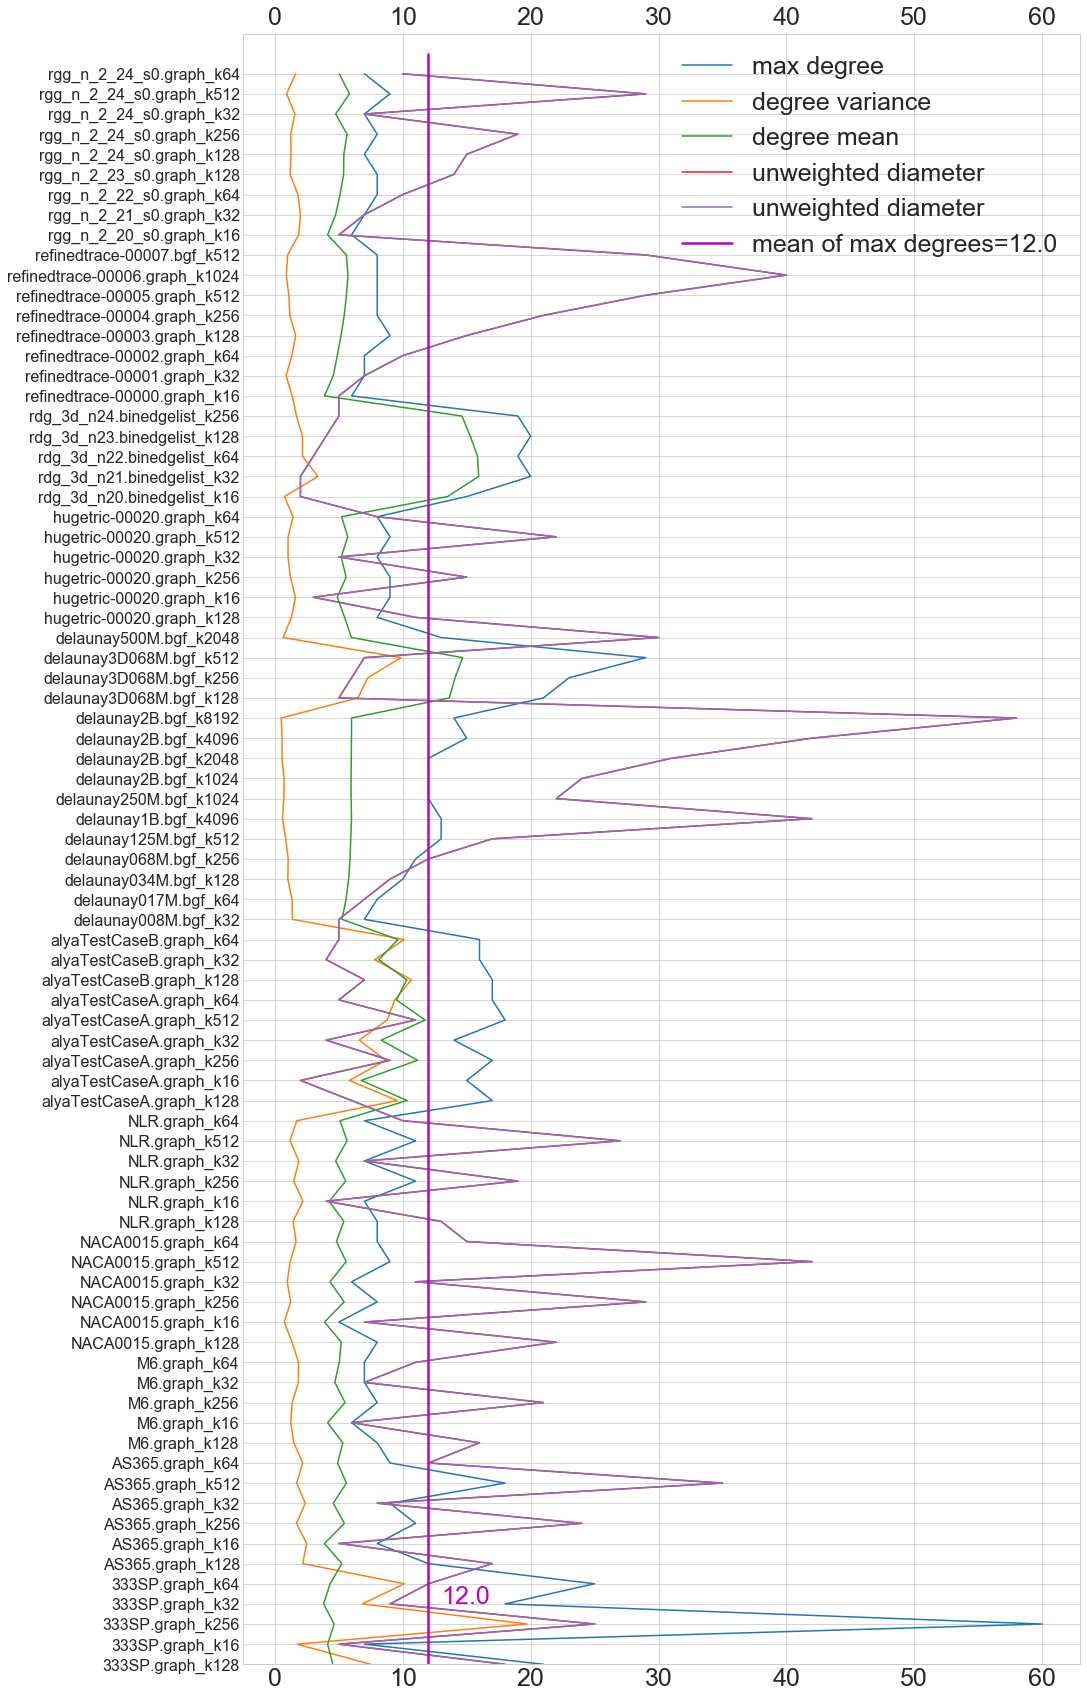

In [9]:
fig, ax = plt.subplots(figsize=(15,30))
plt.rcParams.update({'font.size': 25})

yTicks = [i for i in range(numGraphs)]

plt.plot( allMaxDegrees, yTicks, label='max degree' )
#plt.plot( allMaxNumCores, yTicks, label='max core number'  )
plt.plot( degVariance, yTicks, label='degree variance' )
plt.plot( degMean, yTicks, label='degree mean' )
plt.plot( diameters, yTicks, label='unweighted diameter' )
#plt.plot( [d*10 for d in densities] )

plt.yticks( yTicks , allGraphs, fontsize=16 )
#ax.xaxis.tick_top()
plt.tick_params(labeltop=True)

meanMaxDeg = round( np.mean(allMaxDegrees), 1 )
plt.plot( [meanMaxDeg, meanMaxDeg], [0, numGraphs], label='mean of max degrees=' + str(meanMaxDeg), linewidth=2.5, color='m' )
ax.annotate(meanMaxDeg, xy=(meanMaxDeg,2), xytext=(meanMaxDeg+1, 3), color='m' )

#meanMeanDeg = round( np.mean(degMean), 1 )
#plt.plot( [meanMeanDeg, meanMeanDeg], [0, numGraphs], label='mean of max degrees=' + str(meanMeanDeg), linewidth=2.5, color='r' )
#ax.annotate(meanMeanDeg, xy=(meanMeanDeg,2), xytext=(meanMeanDeg+1, 3), color='r' )

#ax.set_yscale('log', basey=2)
plt.ylim(bottom=0, top=numGraphs+1)
#plt.xlim(right=25)
plt.legend()

plt.show

In [60]:
#sort by number of nodes
sortedAllMaxDegrees = [ x for _,x in sorted( zip(sizeN,allMaxDegrees), key=lambda pair: pair[0]) ]
sortedNumsCores =  [ x for _,x in sorted( zip(sizeN,allMaxNumCores), key=lambda pair: pair[0]) ]
sortedGraphs =  [ x for _,x in sorted( zip(sizeN,allGraphs), key=lambda pair: pair[0]) ]

<function matplotlib.pyplot.show>

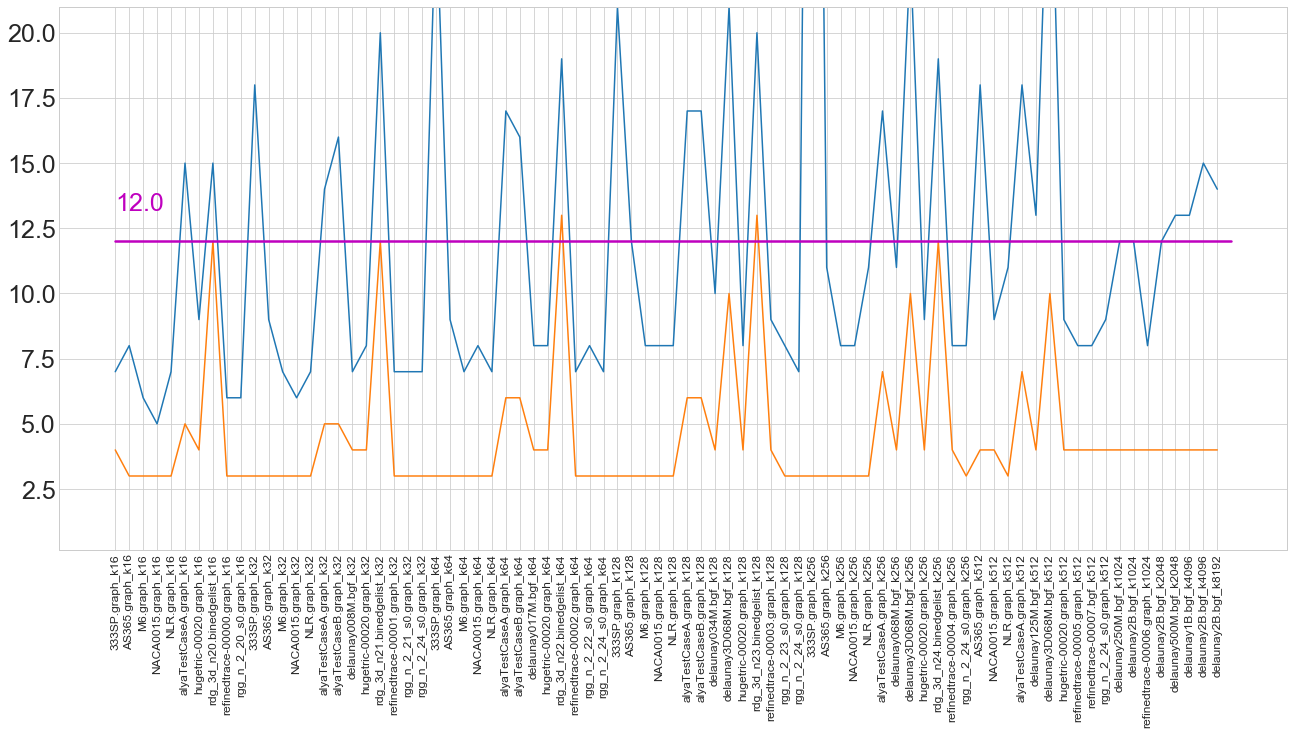

In [61]:
fig, ax = plt.subplots(figsize=(22,10))
plt.rcParams.update({'font.size': 25})

plt.plot( sortedAllMaxDegrees )
plt.plot( sortedNumsCores )

plt.xticks( [i for i in range(numGraphs)] , sortedGraphs, rotation=90, fontsize=12 )

mean = round( np.mean(allMaxDegrees), 1 )
plt.plot( [0, numGraphs], [mean, mean], label='arithmetic mean=' + str(mean), linewidth=2.5, color='m' )
ax.annotate(mean, xy=(0, mean), xytext=(0, mean*1.1), color='m' )

#ax.set_yscale('log', basey=2)
plt.ylim(top=21)

plt.show